# Япония

## Импорт модулей

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

%matplotlib inline

## Данные

Данные были взяты из API $\,$ [Всемирного банка](https://data.worldbank.org/indicator)

\[09.10.2022\]

In [2]:
df = pd.read_csv("./data/japan.csv")
df

,Feature,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"Population, total (thousands)",9.321600e+07,9.405500e+07,9.493300e+07,9.590000e+07,9.690300e+07,9.795200e+07,9.885100e+07,9.987900e+07,1.010110e+08,...,1.276290e+08,1.274450e+08,1.272760e+08,1.271410e+08,1.270760e+08,1.269720e+08,1.268110e+08,1.266330e+08,1.262610e+08,1.256816e+08
1,Population ages 0-14 (% of total population),3.026390e+01,2.940904e+01,2.847836e+01,2.752080e+01,2.663051e+01,2.586565e+01,2.533625e+01,2.485897e+01,2.447670e+01,...,1.324248e+01,1.316591e+01,1.308148e+01,1.298938e+01,1.291436e+01,1.281439e+01,1.269685e+01,1.257303e+01,1.244856e+01,1.229896e+01
2,GDP growth (annual %),NaN,1.204354e+01,8.908973e+00,8.473642e+00,1.167671e+01,5.819708e+00,1.063856e+01,1.108214e+01,1.288247e+01,...,1.374751e+00,2.005100e+00,2.962055e-01,1.560627e+00,7.538267e-01,1.675332e+00,5.840681e-01,-2.403508e-01,-4.506905e+00,1.620796e+00
3,"Unemployment, total (% of total labor force) (...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.360000e+00,4.000000e+00,3.600000e+00,3.400000e+00,3.100000e+00,2.800000e+00,2.400000e+00,2.400000e+00,2.800000e+00,2.799000e+00
4,Exports of goods and services (% of GDP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.441477e+01,1.578416e+01,1.741866e+01,1.743676e+01,1.605797e+01,1.759144e+01,1.832602e+01,1.744538e+01,1.555855e+01,NaN
5,Imports of goods and services (% of GDP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.605614e+01,1.819461e+01,2.001278e+01,1.799065e+01,1.525228e+01,1.683177e+01,1.830605e+01,1.773444e+01,1.580016e+01,NaN
6,GDP per capita (current US$),4.753191e+02,5.689077e+02,6.396408e+02,7.246938e+02,8.436169e+02,9.285188e+02,1.068558e+03,1.239318e+03,1.451338e+03,...,4.914528e+04,4.089865e+04,3.847540e+04,3.496064e+04,3.937547e+04,3.883405e+04,3.972712e+04,4.045800e+04,3.991817e+04,3.928516e+04


In [3]:
years = df.columns.values[1:]
population = df.loc[df["Feature"] == "Population, total (thousands)"].values[0, 1:]
young_population = df.loc[df["Feature"] == "Population ages 0-14 (% of total population)"].values[0, 1:]
gdp = df.loc[df["Feature"] == "GDP growth (annual %)"].values[0, 1:]
unemployment = df.loc[df["Feature"] == "Unemployment, total (% of total labor force) (modeled ILO estimate)"].values[0, 1:]
exports = df.loc[df["Feature"] == "Exports of goods and services (% of GDP)"].values[0, 1:]
imports = df.loc[df["Feature"] == "Imports of goods and services (% of GDP)"].values[0, 1:]
gdp_per_capita = df.loc[df["Feature"] == "GDP per capita (current US$)"].values[0, 1:]

#### Изменение уровня популяции

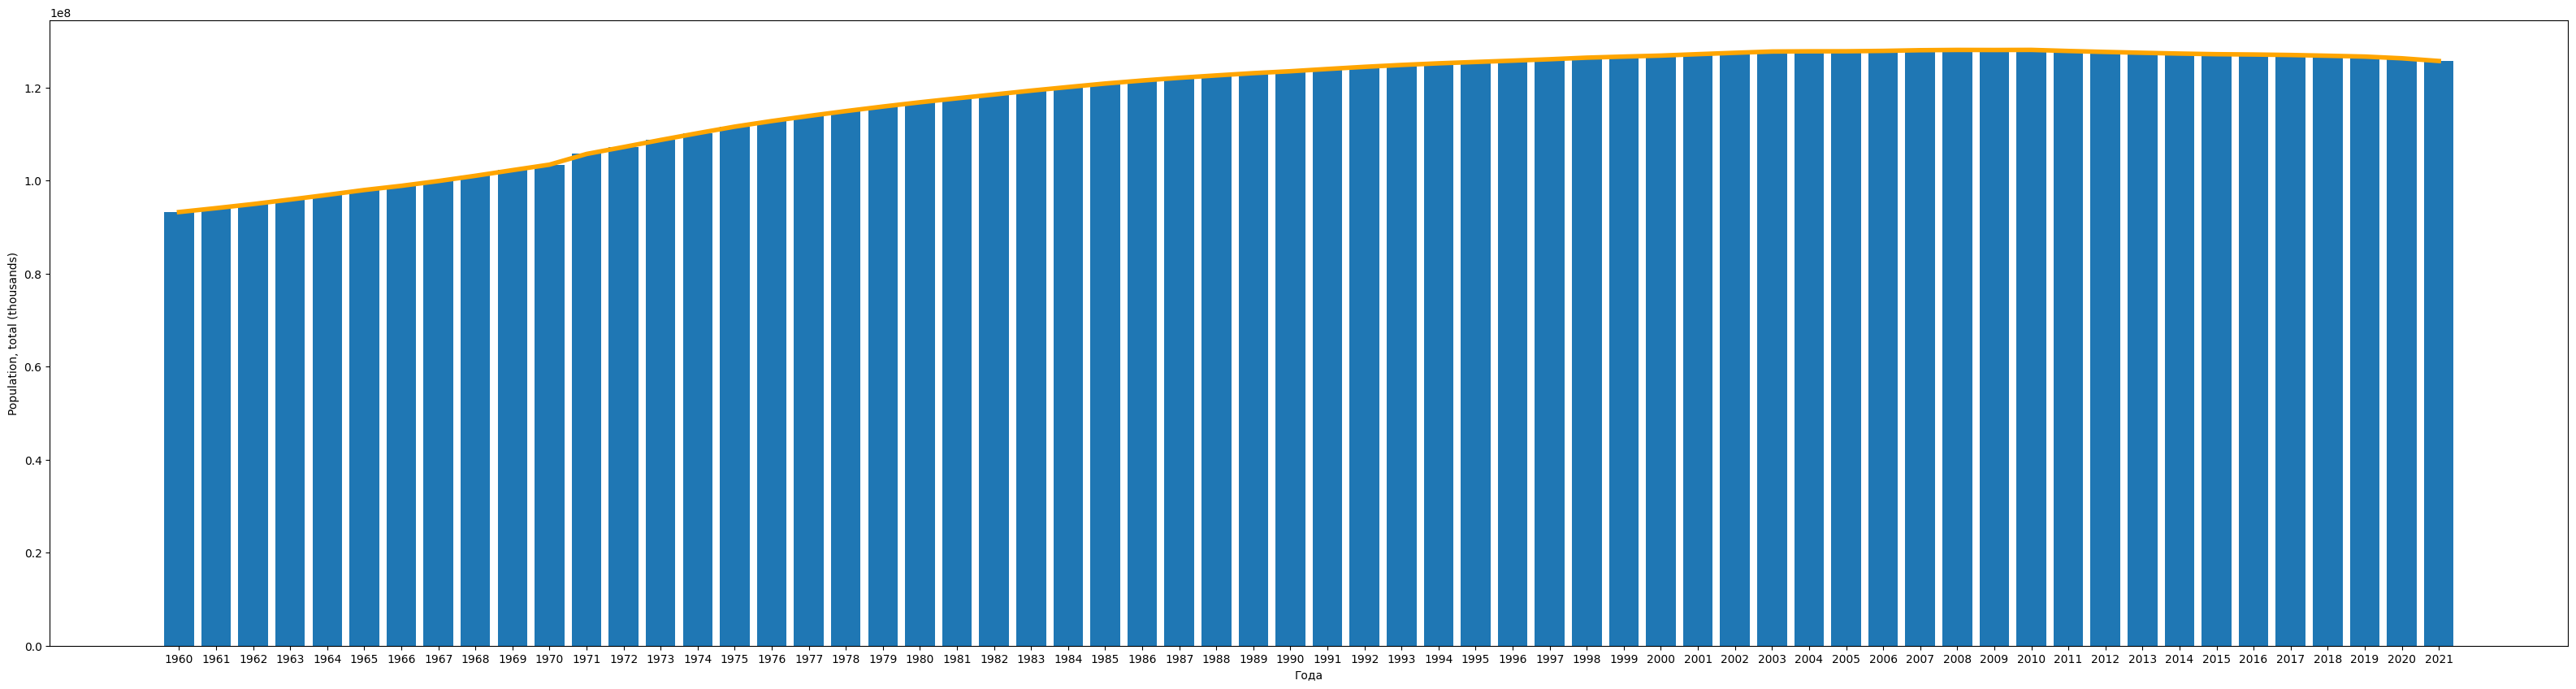

In [4]:
plt.figure(figsize=(40, 10))
plt.bar(years, population)
plt.plot(population, linewidth="4", color="orange")
plt.xlabel("Года")
plt.ylabel("Population, total (thousands)")
plt.show()

Можно заметить, что до 2005-2006 года наблюдался рост численности людей, после уровень популяции вышел на плато, а затем (с 2010 года) начал постепенно убывать.

#### Изменение уровня популяции молодого населения

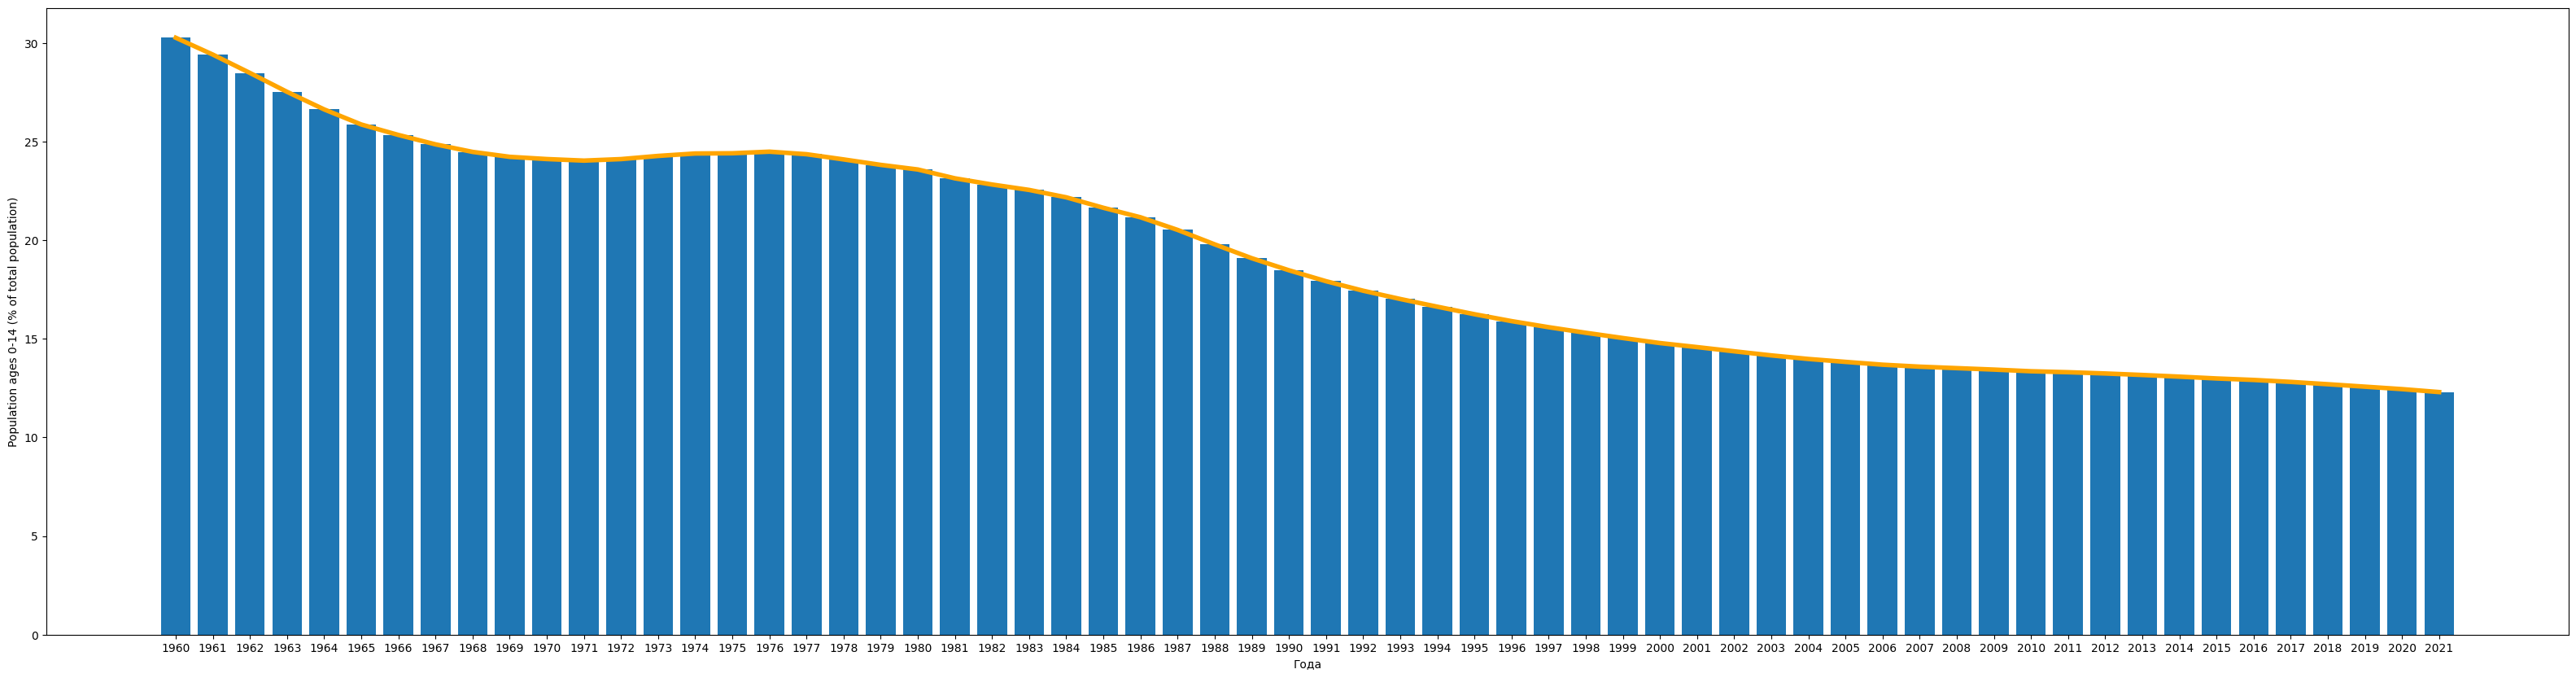

In [5]:
plt.figure(figsize=(40, 10))
plt.bar(years, young_population)
plt.plot(young_population, linewidth="4", color="orange")
plt.xlabel("Года")
plt.ylabel("Population ages 0-14 (% of total population)")
plt.show()

Стоит также проанализировать и "молодую" часть населения Японии.

На графике видно, что детей становиться с каждым годом всё меньше и меньше.

<table>
    <tr>
        <td><img src="data/population_pyramid_1950.png"/></td>
        <td><img src="data/population_pyramid_2020.png"/></td>
        <td><img src="data/population_pyramid_2050.png"/></td>
    </tr>
</table>

Проблема демографии не обошла и Японию, по демографическим пирамидам можно заметить, что на сегодняшний день основную часть населения составляют люди в "зрелом" возрасте.

Если ничего не поменяется, то прогнозируют, что к 2050 году в Японии сократится население на 20 миллионом человек.

#### Измерение темпов роста ВВП

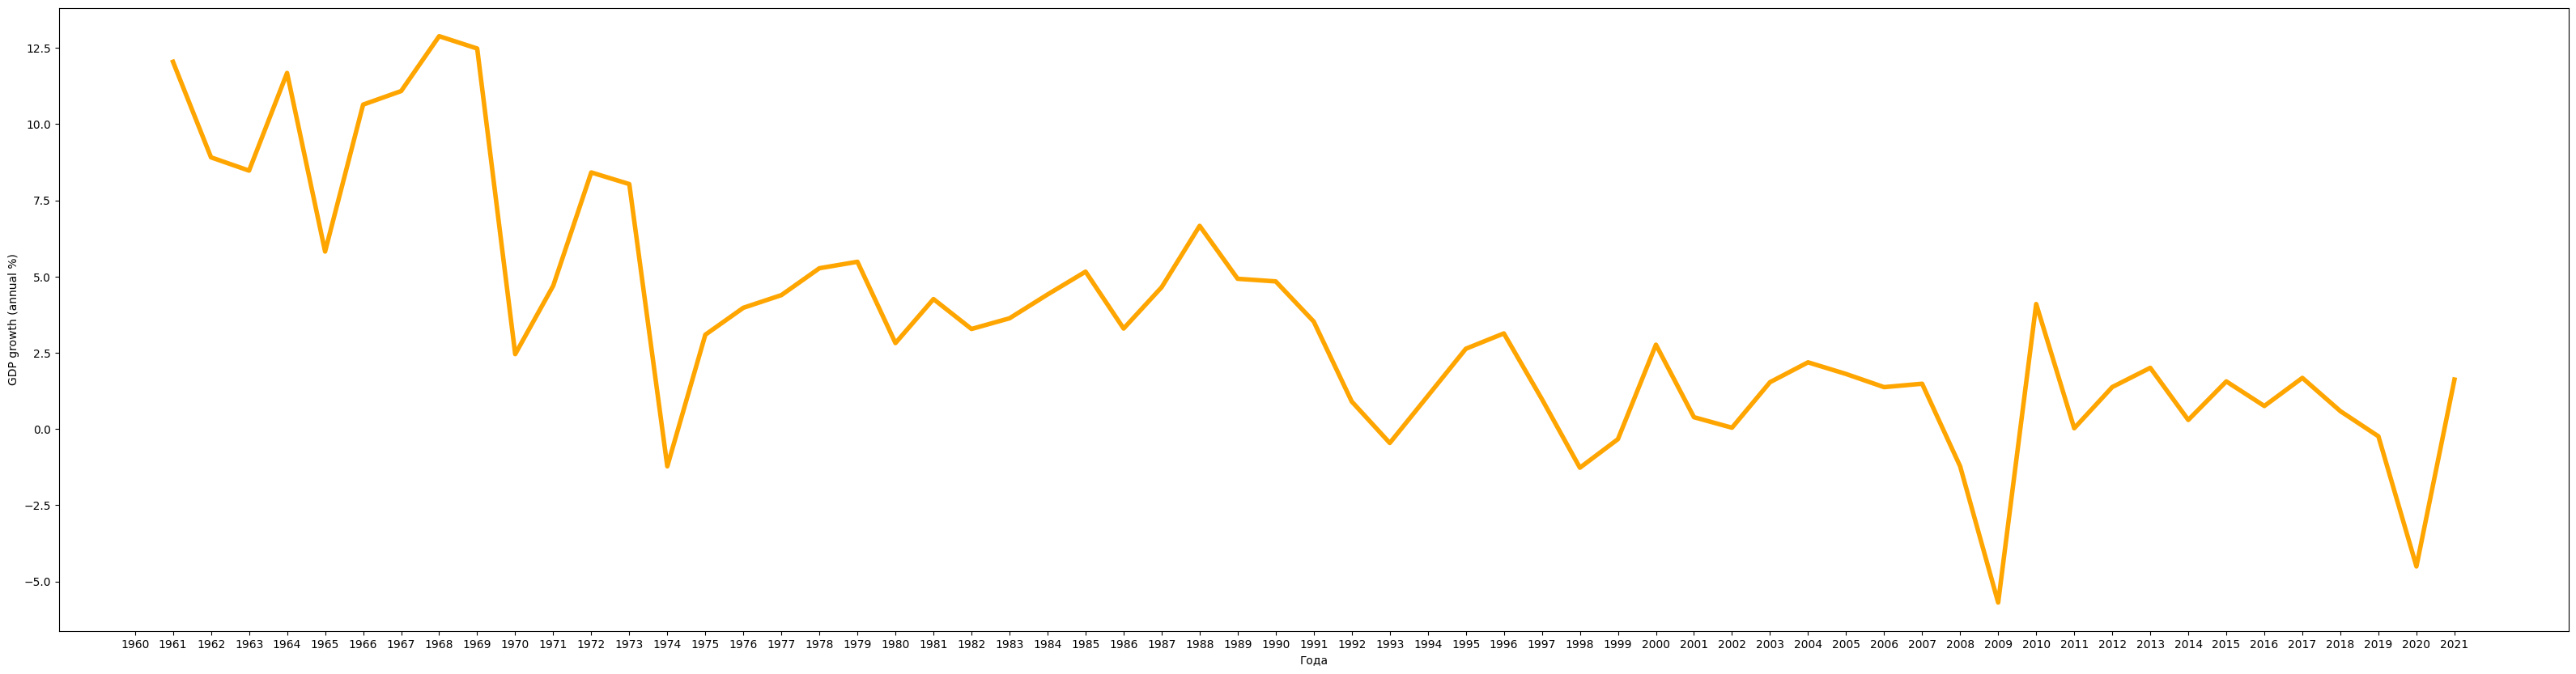

In [6]:
plt.figure(figsize=(40, 10))
plt.plot(years, gdp, linewidth="4", color="orange")
plt.xlabel("Года")
plt.ylabel("GDP growth (annual %)")
plt.show()

Можно заметить что с середины 1950 до 1973 года темпы прироста ВВП были достаточно велики, составляли более 10% ежегодно и это были самые высокие показатели прироста ВВП среди развитых стран того времени.

Этот феномен называют [Японское экономическое чудо](https://ru.wikipedia.org/wiki/%D0%AF%D0%BF%D0%BE%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D1%8D%D0%BA%D0%BE%D0%BD%D0%BE%D0%BC%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D1%87%D1%83%D0%B4%D0%BE).

_Причины:_
- дешевизна рабочей силы;
- объединение производителей, поставщиков ресурсов, сбытчиков продукции и банков в тесно связанные группы;
- взаимовыгодные отношения предпринимателей с правительством;
- Корейская война, поставка вооружения США через Японию;
- отсутствие военных расходов у Японии (отказ от милитаристского бюджета). В 1972 году его доля составила только 1% от ВНП;
- освоение японской наукой новых технологий, скупка патентов и лицензий;
- ...

_Спады:_
- 1973 год случился [Нефтяной кризис](https://ru.wikipedia.org/wiki/%D0%9D%D0%B5%D1%84%D1%82%D1%8F%D0%BD%D0%BE%D0%B9_%D0%BA%D1%80%D0%B8%D0%B7%D0%B8%D1%81_1973_%D0%B3%D0%BE%D0%B4%D0%B0);
- 2008 год тоже был [Мировой кризис](https://ru.wikipedia.org/wiki/%D0%9C%D0%B8%D1%80%D0%BE%D0%B2%D0%BE%D0%B9_%D1%8D%D0%BA%D0%BE%D0%BD%D0%BE%D0%BC%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D1%80%D0%B8%D0%B7%D0%B8%D1%81_(%D1%81_2008));
- 2020 году был COVID-19.

In [7]:
gdp[~pd.isnull(gdp)][10:].mean()

2.238326641651171

Если посмотреть, то за исключением кризисов был стабильный ежегодный прирост ВВП в среднем на 2.24%.

#### Измерение уровня безработицы

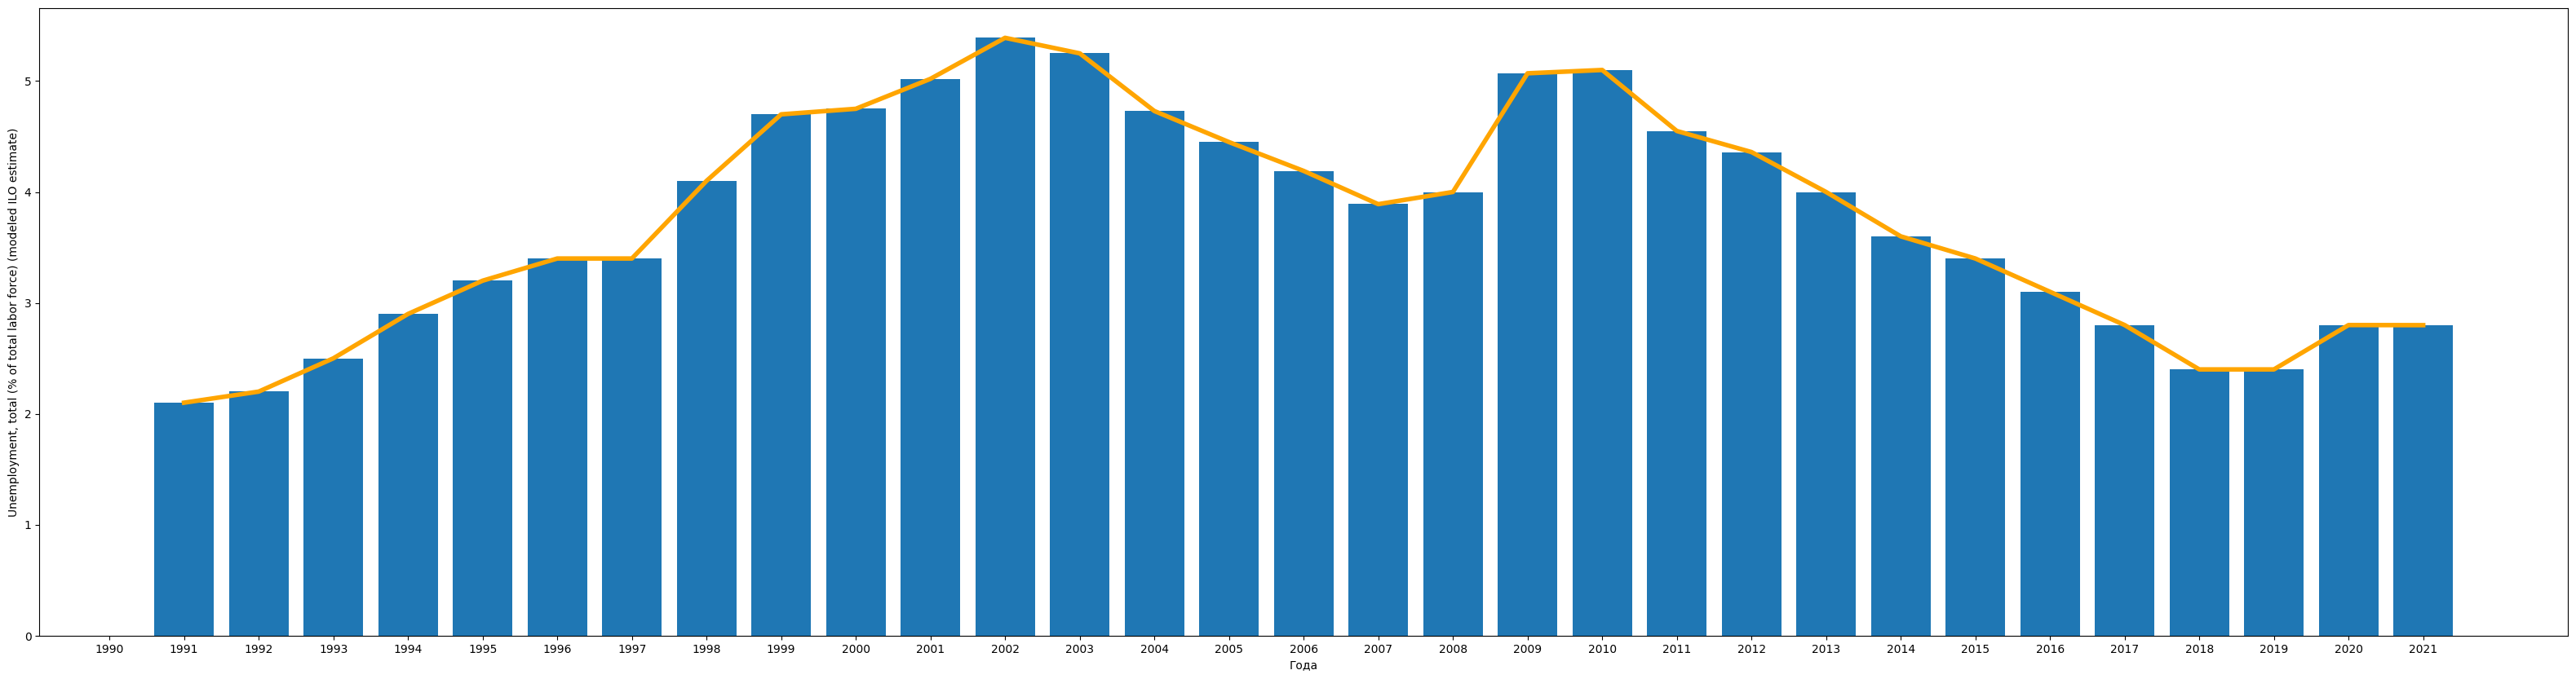

In [8]:
plt.figure(figsize=(40, 10))
plt.bar(years, unemployment)
plt.plot(unemployment, linewidth="4", color="orange")
plt.xlabel("Года")
plt.ylabel("Unemployment, total (% of total labor force) (modeled ILO estimate)")
plt.show()

In [9]:
unemployment[~pd.isnull(unemployment)].mean()

3.759645169781101

Можно заметить, что уровень безработицы в Японии достаточно низкий и в среднем составляет 3.7%.

#### Изменение уровня объёма экспорта

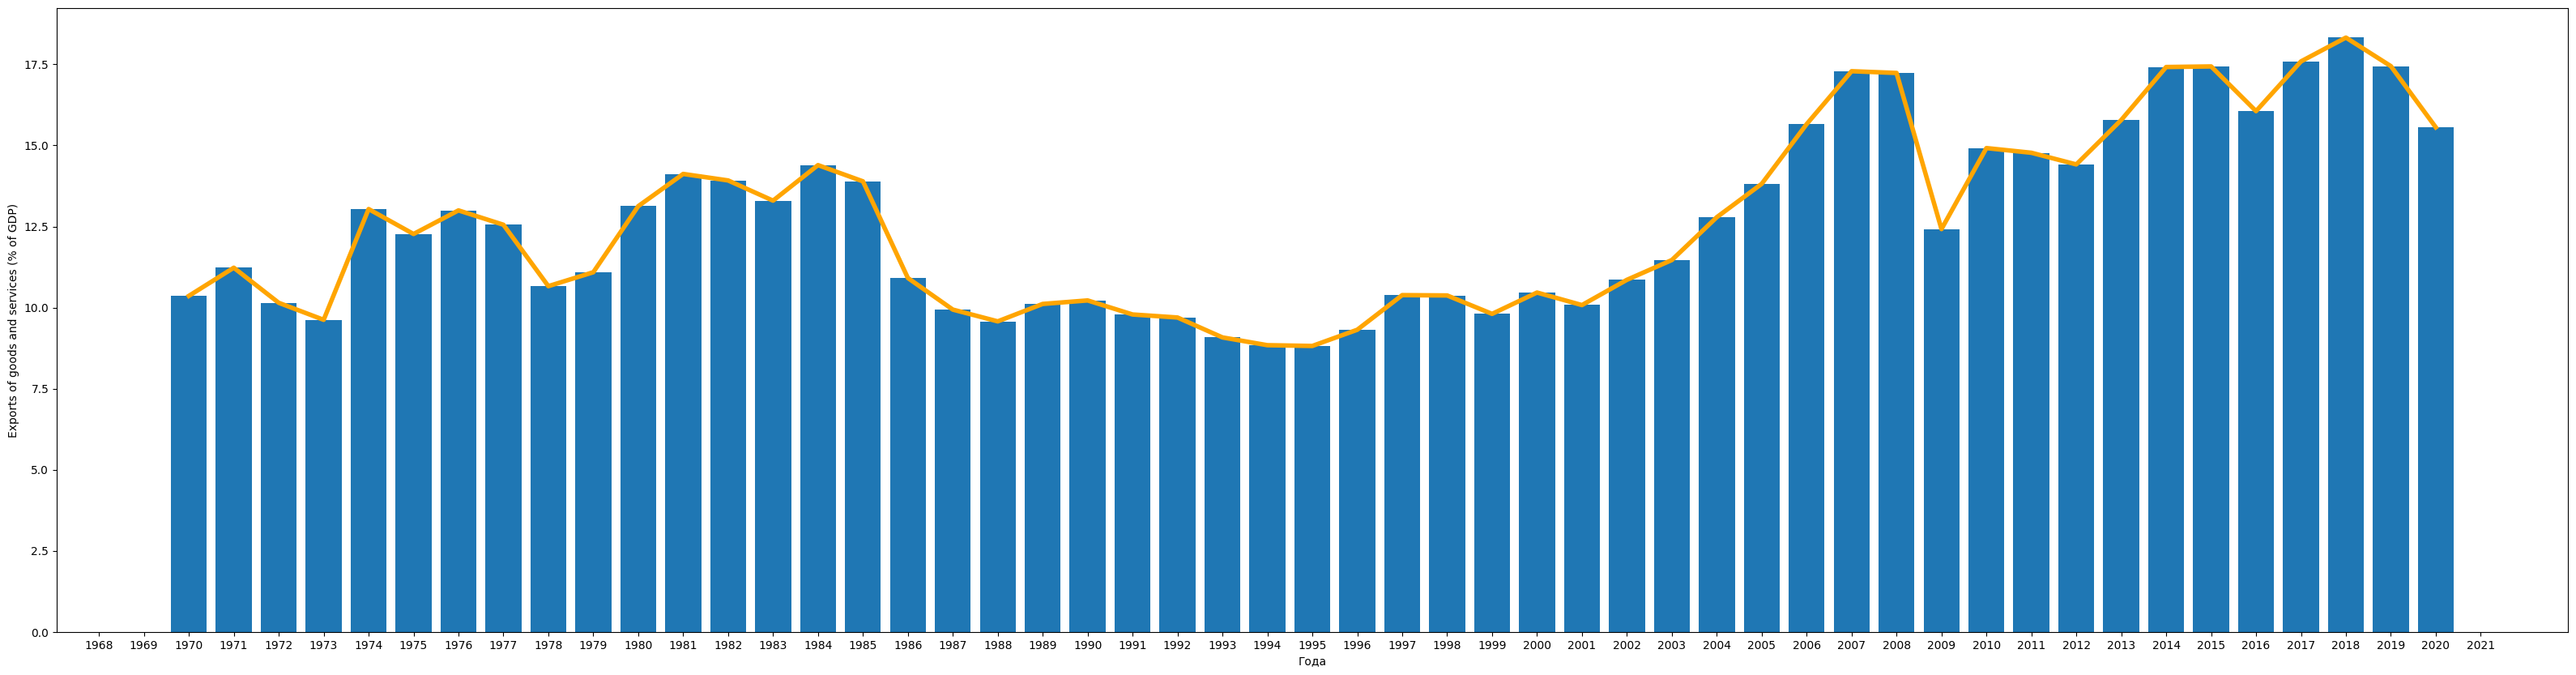

In [10]:
plt.figure(figsize=(40, 10))
plt.bar(years, exports)
plt.plot(exports, linewidth="4", color="orange")
plt.xlabel("Года")
plt.ylabel("Exports of goods and services (% of GDP)")
plt.show()

Страна не очень богата природными ресурсами, но тем не менее она является одним из гланых мировых экспортёров в отраслях:
- робототехники;
- автомобилестроения;
- электронно-вычислительной техники;
- бытовой химии.

#### Изменение уровня объёма импорта

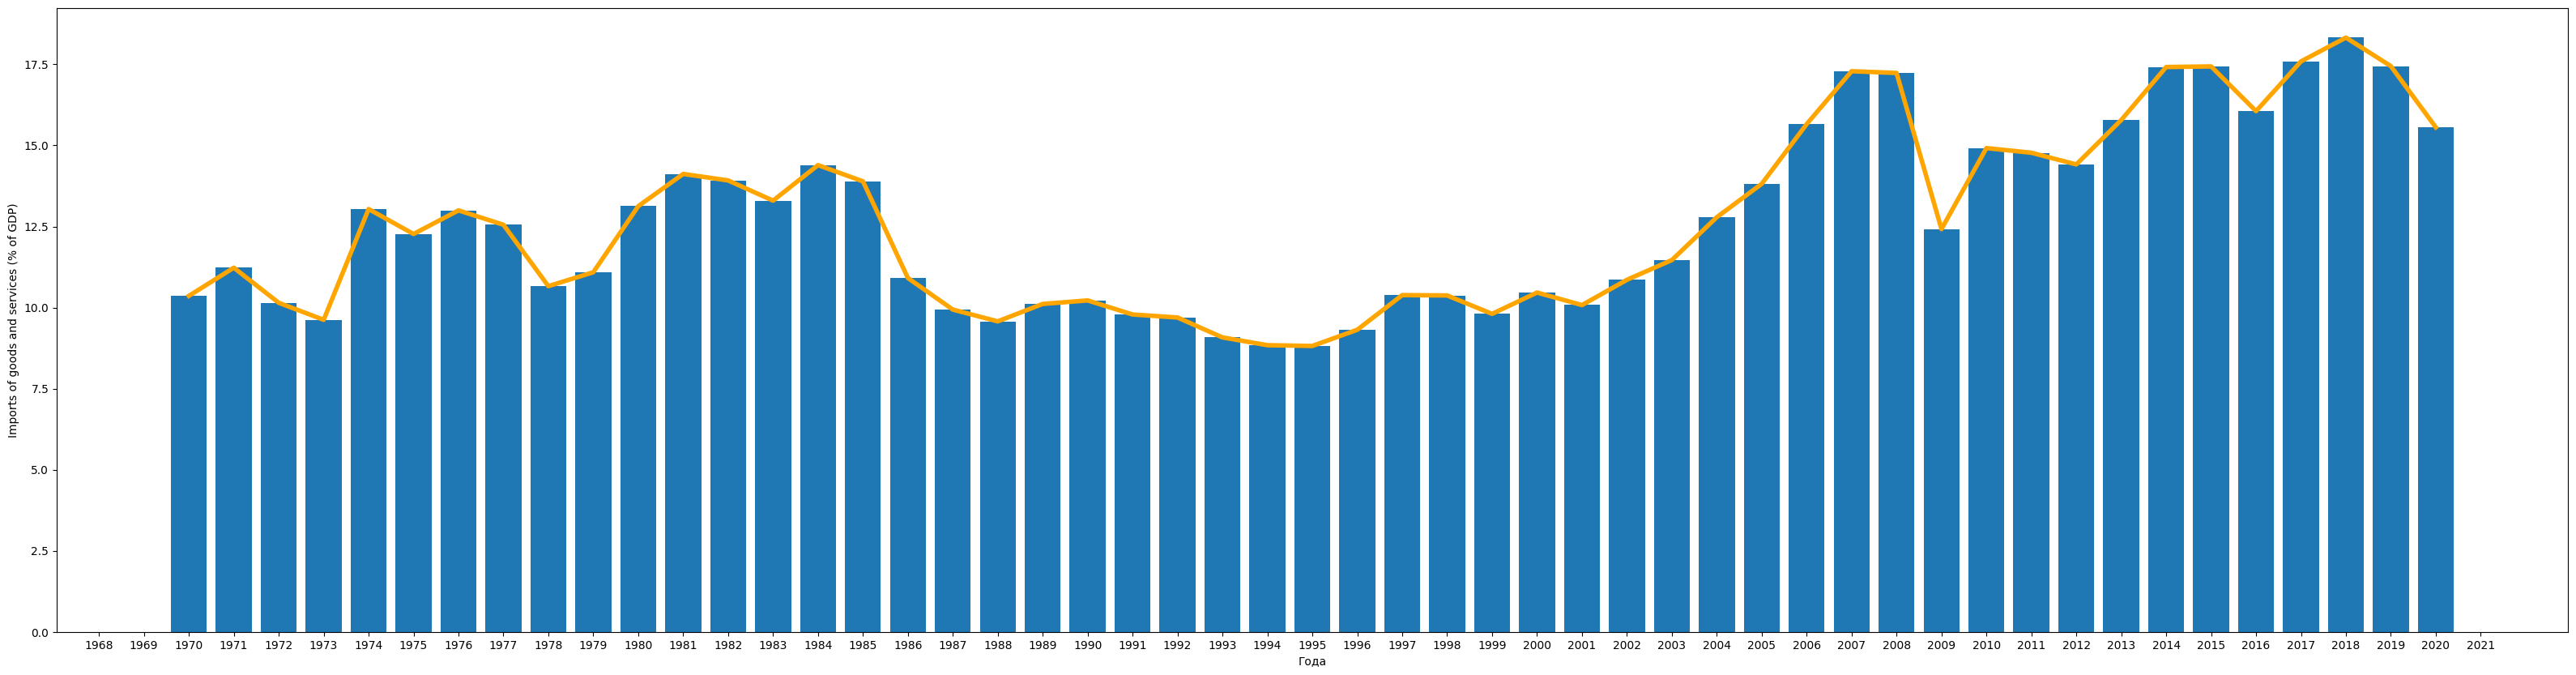

In [11]:
plt.figure(figsize=(40, 10))
plt.bar(years, exports)
plt.plot(exports, linewidth="4", color="orange")
plt.xlabel("Года")
plt.ylabel("Imports of goods and services (% of GDP)")
plt.show()

Основными товарами импорта являются:
- минеральные ресурсы;
- текстильные товары;
- металло-продукция;
- продукты питания.

#### Изменение подушевого ВВП

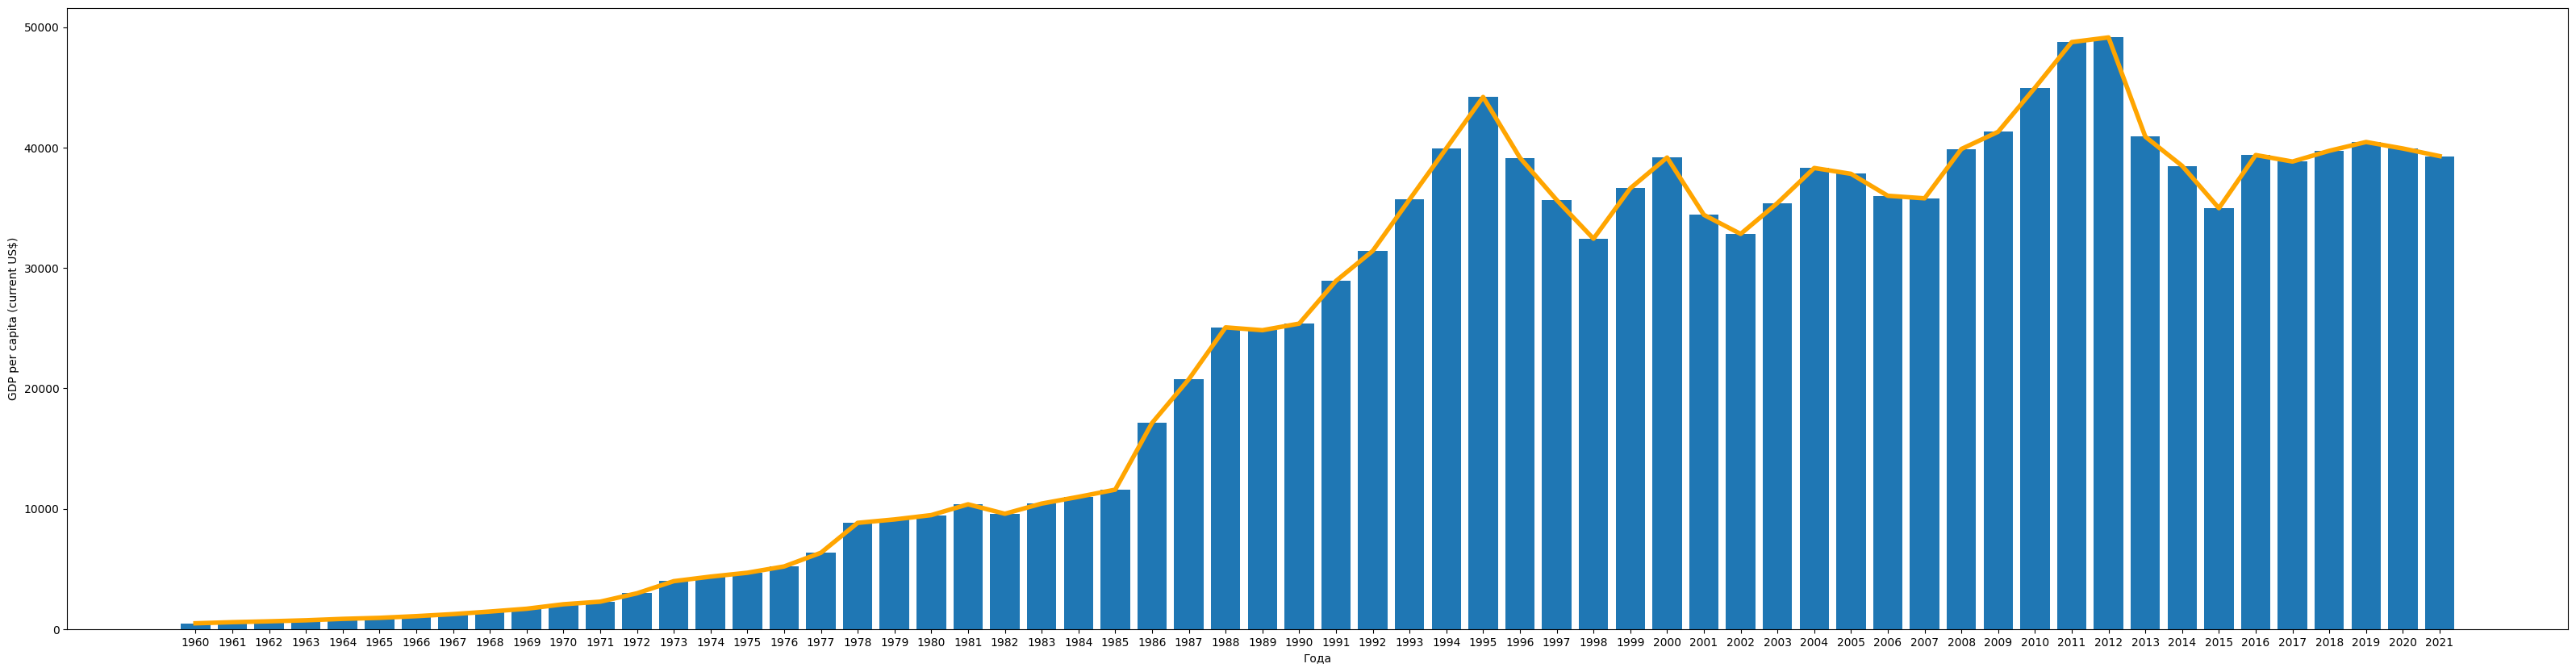

In [12]:
plt.figure(figsize=(40, 10))
plt.bar(years, gdp_per_capita)
plt.plot(gdp_per_capita, linewidth="4", color="orange")
plt.xlabel("Года")
plt.ylabel("GDP per capita (current US$)")
plt.show()

## Прогнозы

#### Прогноз изменения уровня безработицы

Попытаемся спрогнозировать уровень безработицы на ближайшие 10 лет.

In [13]:
forecast_year = 10

In [14]:
unemployment_pre = np.array(unemployment[~pd.isnull(unemployment)], dtype=np.float64)
len_un_pre = len(unemployment_pre)

Построим график автокорреляции, чтобы определить параметр $p$ в модели SARIMAX.

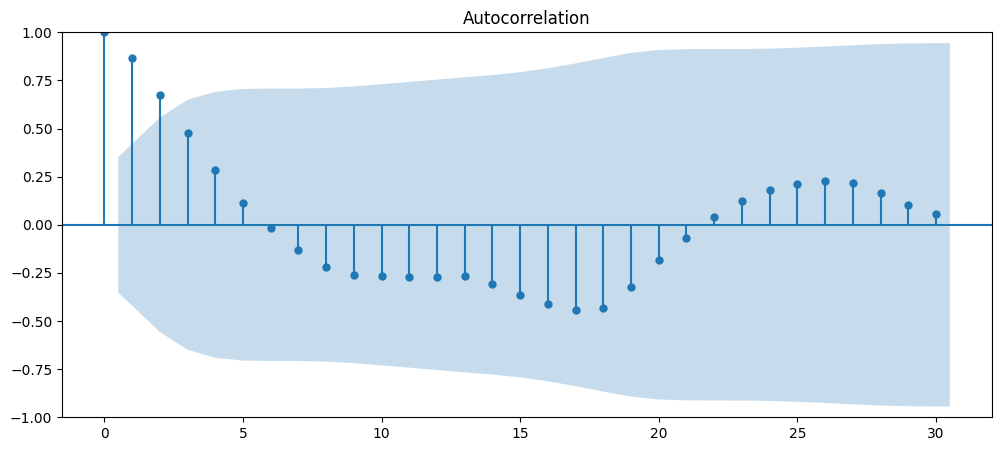

In [15]:
plt.rcParams["figure.figsize"] = (12,5)
plot_acf(unemployment_pre, lags=30)
plt.show()

Построим график частичной автокорреляции, чтобы определить параметр $q$ в модели SARIMAX.

/home/egor/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


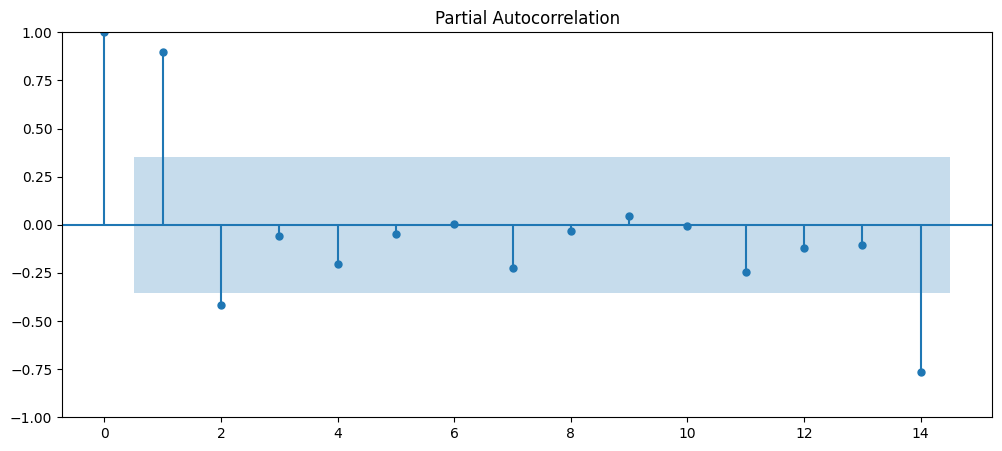

In [16]:
plt.rcParams["figure.figsize"] = (12,5)
plot_pacf(unemployment_pre, lags=14)
plt.show()

In [17]:
years_labels = years[len(years) - len_un_pre:]
for i in range(forecast_year):
    years_labels = np.append(years_labels, f"{int(years_labels[len(years_labels) - 1]) + 1}")

In [18]:
model = SARIMAX(unemployment_pre,
                order = (3, 2, 1),
                seasonal_order = (2, 1, 1, 12)).fit(method='bfgs')

unemployment_forecast = model.predict(start = len_un_pre,
                                      end = len_un_pre + forecast_year - 1,
                                      typ = 'levels')

/home/egor/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


         Current function value: 0.369916
         Iterations: 11
         Function evaluations: 41
         Gradient evaluations: 31


/home/egor/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


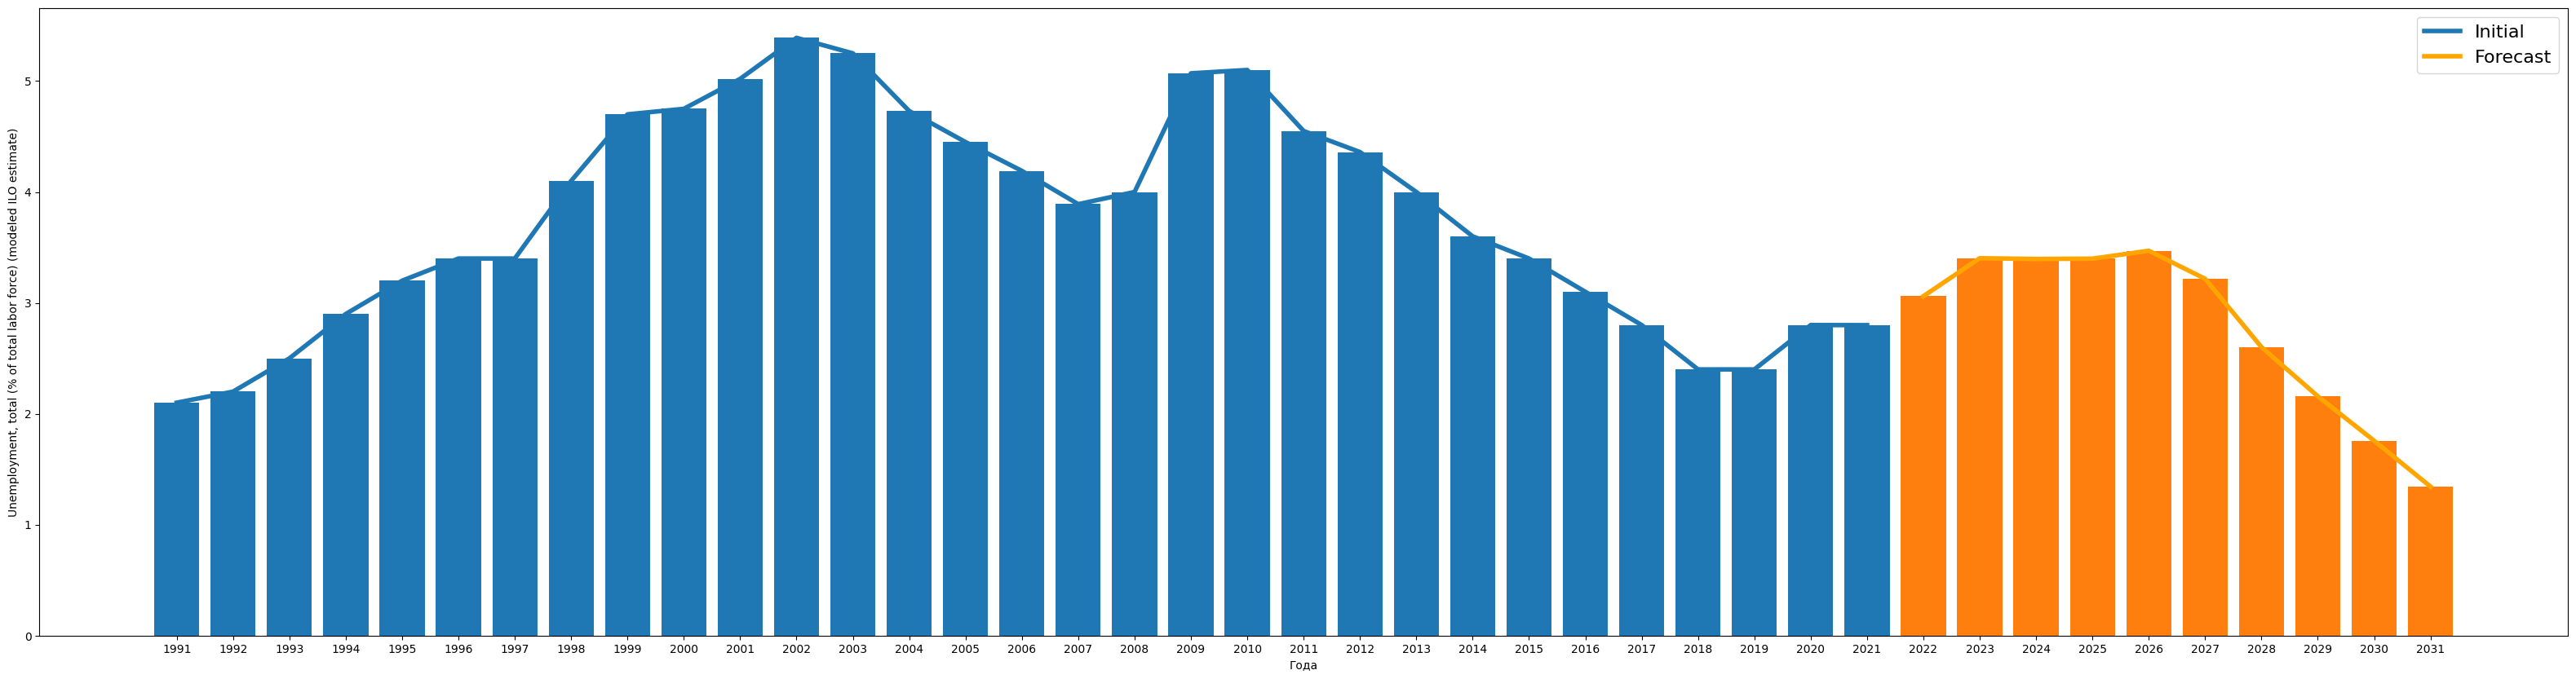

In [19]:
x_range = list(range(len_un_pre))
forecast_x_range = list(range(len_un_pre, len_un_pre + forecast_year))
x_ticks_labels = list(range(len_un_pre + forecast_year))

plt.figure(figsize=(40, 10))
plt.plot(x_range, unemployment_pre, linewidth="4", label="Initial")
plt.bar(x_range, unemployment_pre)
plt.plot(forecast_x_range, unemployment_forecast, linewidth="4", color="orange", label="Forecast")
plt.bar(forecast_x_range, unemployment_forecast)
plt.xticks(x_ticks_labels, years_labels)
plt.xlabel("Года")
plt.ylabel("Unemployment, total (% of total labor force) (modeled ILO estimate)")
plt.legend(prop={'size': 16})
plt.show()

#### Прогноз изменения темпов роста ВВП

Попытаемся спрогнозировать темпы роста ВВП на ближайшие 10 лет.

In [20]:
forecast_year = 10

In [21]:
gdp_pre = np.array(gdp[~pd.isnull(gdp)], dtype=np.float64)
len_gdp_pre = len(gdp_pre)

Построим график автокорреляции, чтобы определить параметр $p$ в модели SARIMAX.

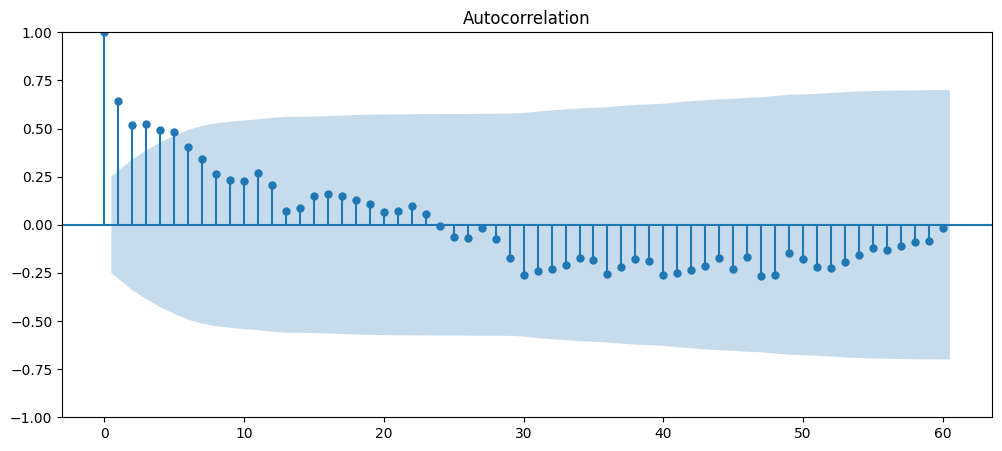

In [22]:
plt.rcParams["figure.figsize"] = (12,5)
plot_acf(gdp_pre, lags=60)
plt.show()

Построим график частичной автокорреляции, чтобы определить параметр $q$ в модели SARIMAX.

/home/egor/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


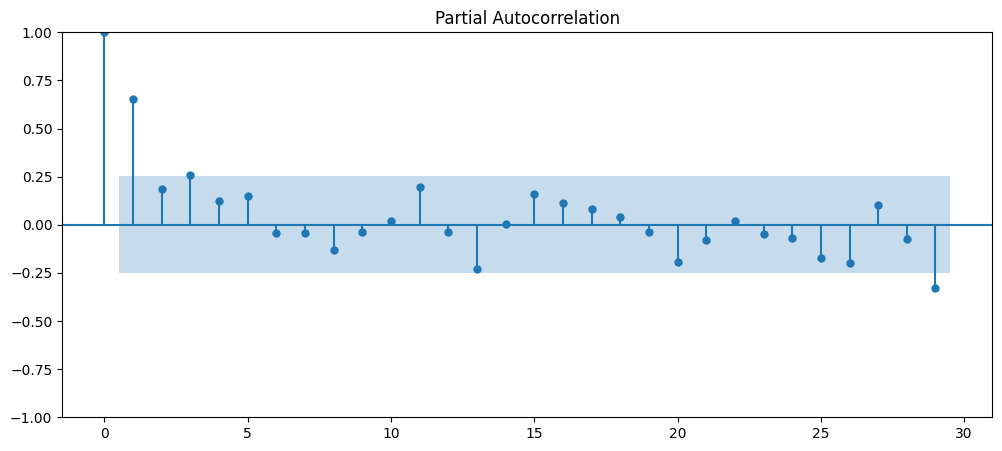

In [23]:
plt.rcParams["figure.figsize"] = (12,5)
plot_pacf(gdp_pre, lags=29)
plt.show()

In [24]:
years_labels = years[len(years) - len_gdp_pre:]
for i in range(forecast_year):
    years_labels = np.append(years_labels, f"{int(years_labels[len(years_labels) - 1]) + 1}")

In [25]:
model = SARIMAX(gdp_pre,
                order = (5, 2, 1),
                seasonal_order = (2, 1, 1, 12)).fit(method='bfgs')

gdp_forcast = model.predict(start = len_gdp_pre,
                            end = len_gdp_pre + forecast_year - 1,
                            typ = 'levels')

/home/egor/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/egor/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


         Current function value: 2.247860
         Iterations: 0
         Function evaluations: 41
         Gradient evaluations: 29


/home/egor/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


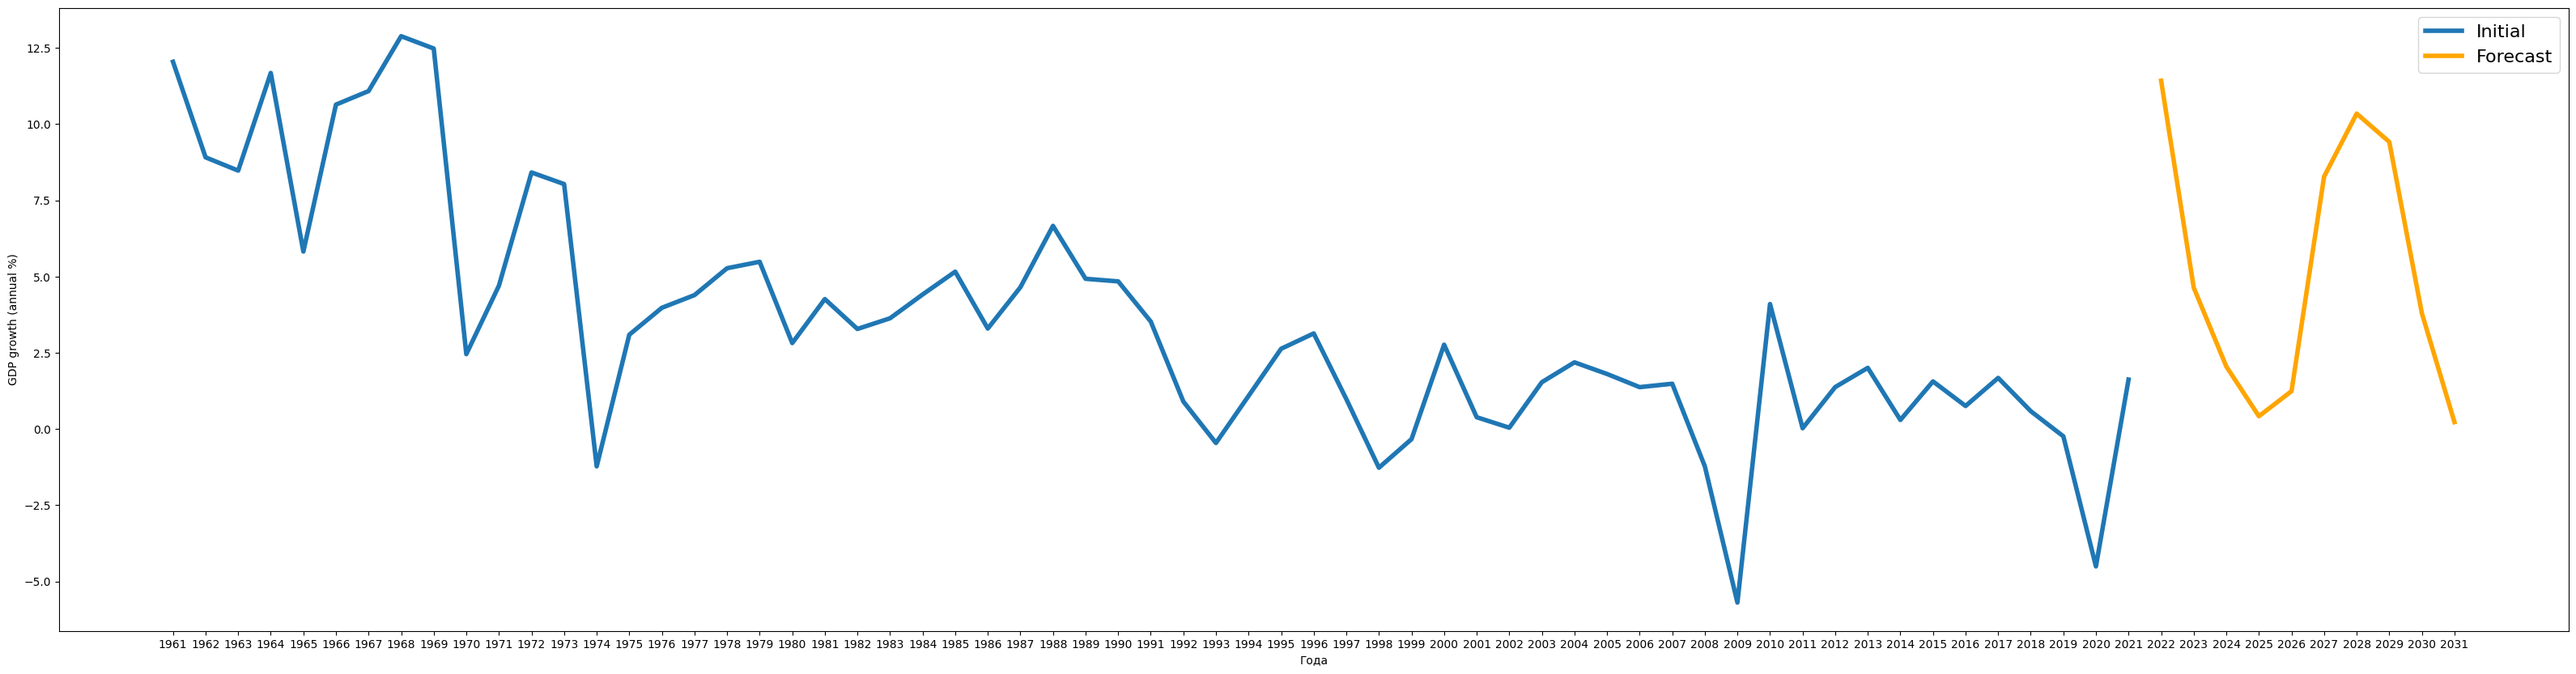

In [26]:
x_range = list(range(len_gdp_pre))
forecast_x_range = list(range(len_gdp_pre, len_gdp_pre + forecast_year))
x_ticks_labels = list(range(len_gdp_pre + forecast_year))

plt.figure(figsize=(40, 10))
plt.plot(x_range, gdp_pre, linewidth="4", label="Initial")
plt.plot(forecast_x_range, gdp_forcast, linewidth="4", color="orange", label="Forecast")
plt.xticks(x_ticks_labels, years_labels)
plt.xlabel("Года")
plt.ylabel("GDP growth (annual %)")
plt.legend(prop={'size': 16})
plt.show()

#### Прогноз изменения уровня популяции молодого населения

Попытаемся спрогнозировать уровень популяции молодого населения на ближайшие 10 лет.

In [27]:
forecast_year = 10

In [28]:
young_population_pre = np.array(young_population[~pd.isnull(young_population)], dtype=np.float64)
len_yp_pre = len(young_population_pre)

Построим график автокорреляции, чтобы определить параметр $p$ в модели SARIMAX.

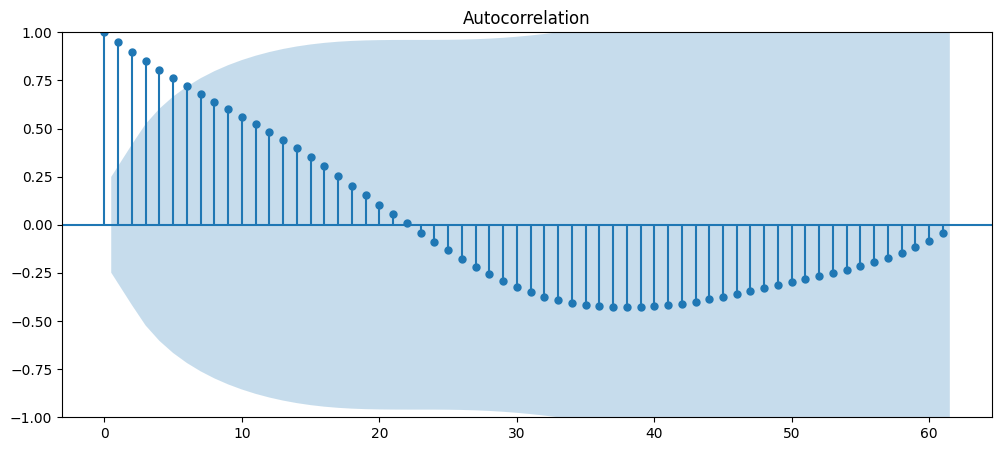

In [29]:
plt.rcParams["figure.figsize"] = (12,5)
plot_acf(young_population_pre, lags=61)
plt.show()

Построим график частичной автокорреляции, чтобы определить параметр $q$ в модели SARIMAX.

/home/egor/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


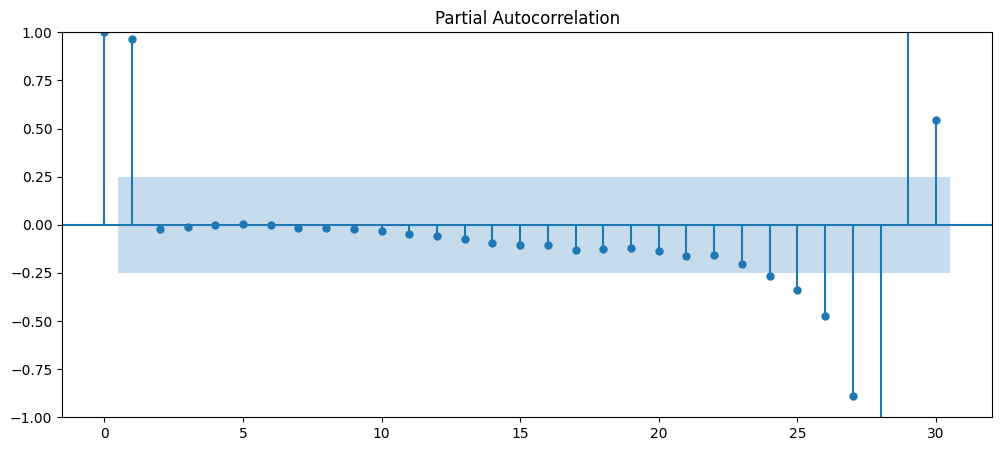

In [30]:
plt.rcParams["figure.figsize"] = (12,5)
plot_pacf(young_population_pre, lags=30)
plt.show()

In [31]:
years_labels = years[len(years) - len_yp_pre:]
for i in range(forecast_year):
    years_labels = np.append(years_labels, f"{int(years_labels[len(years_labels) - 1]) + 1}")

In [32]:
model = SARIMAX(young_population_pre,
                order = (6, 2, 1),
                seasonal_order = (2, 1, 1, 12)).fit(method='bfgs')

young_population_forecast = model.predict(start = len_yp_pre,
                                          end = len_yp_pre + forecast_year - 1,
                                          typ = 'levels')

/home/egor/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


         Current function value: -0.789785
         Iterations: 1
         Function evaluations: 38
         Gradient evaluations: 26


/home/egor/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


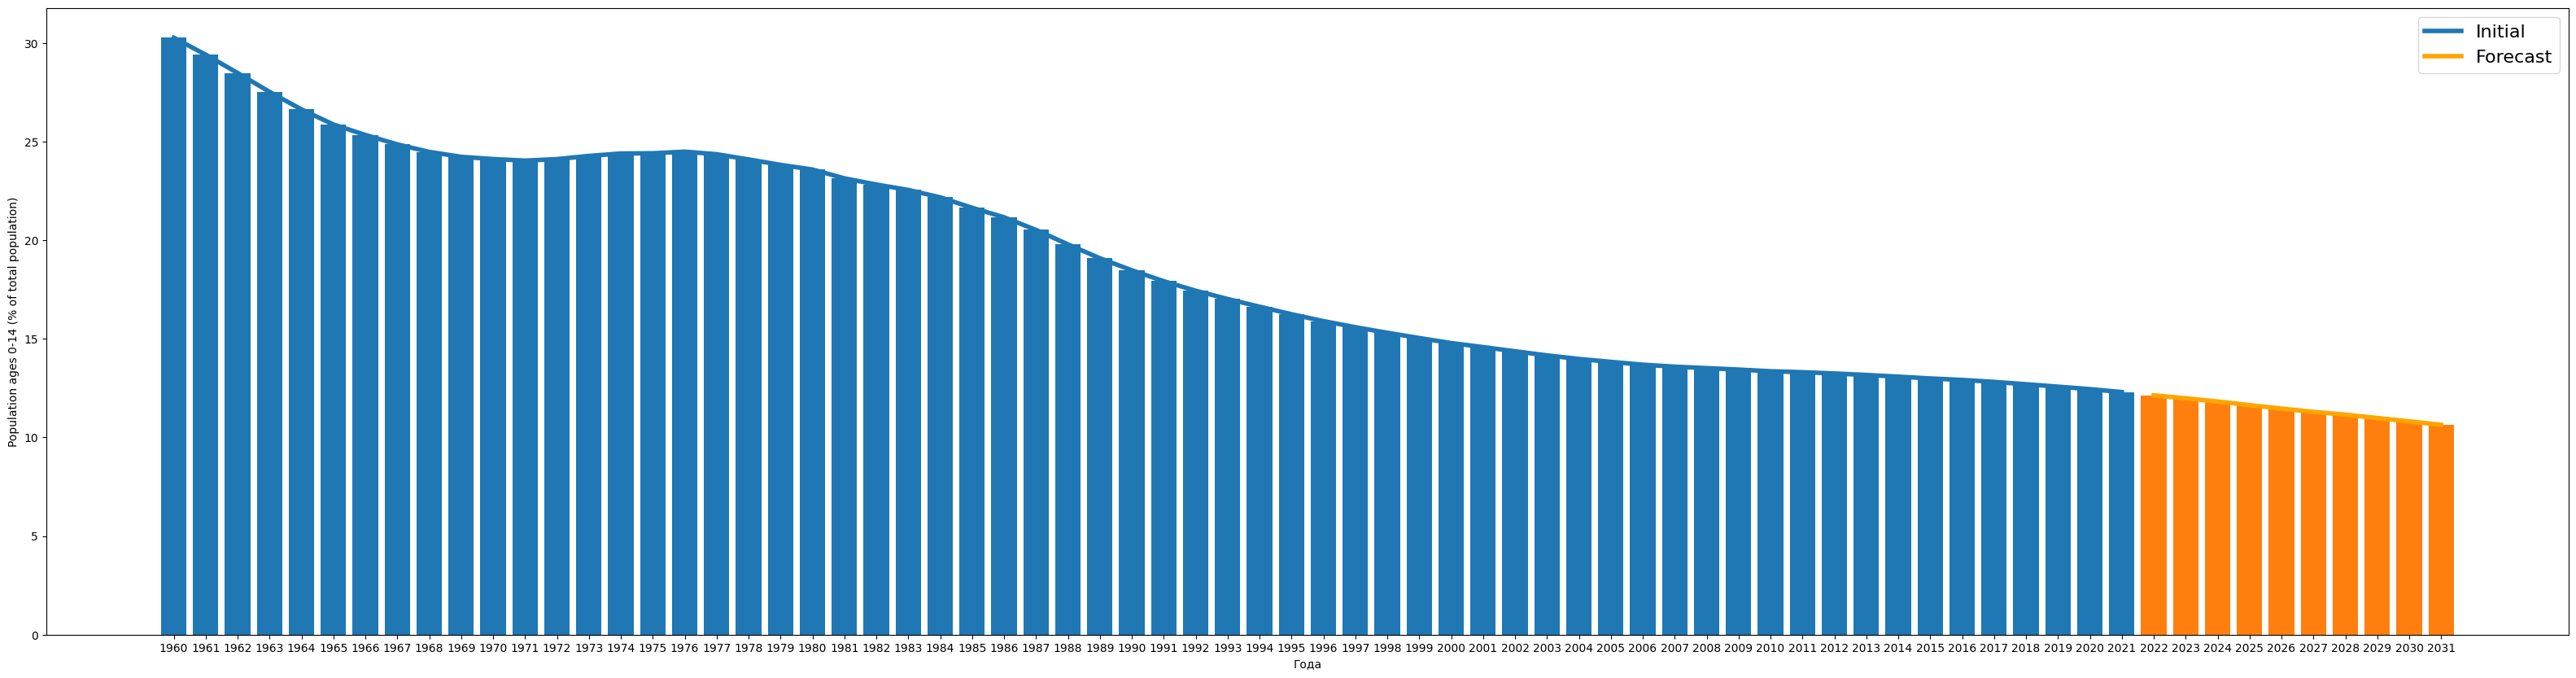

In [33]:
x_range = list(range(len_yp_pre))
forecast_x_range = list(range(len_yp_pre, len_yp_pre + forecast_year))
x_ticks_labels = list(range(len_yp_pre + forecast_year))

plt.figure(figsize=(40, 10))
plt.plot(x_range, young_population_pre, linewidth="4", label="Initial")
plt.bar(x_range, young_population_pre)
plt.plot(forecast_x_range, young_population_forecast, linewidth="4", color="orange", label="Forecast")
plt.bar(forecast_x_range, young_population_forecast)
plt.xticks(x_ticks_labels, years_labels)
plt.xlabel("Года")
plt.ylabel("Population ages 0-14 (% of total population)")
plt.legend(prop={'size': 16})
plt.show()

#### Прогноз изменения уровня объёма экспорта

Попытаемся спрогнозировать уровень объёма экспорта на ближайшие 10 лет.

In [34]:
forecast_year = 10

In [35]:
exports_pre = np.array(exports[~pd.isnull(exports)], dtype=np.float64)
len_exports_pre = len(exports_pre)

Построим график автокорреляции, чтобы определить параметр $p$ в модели SARIMAX.

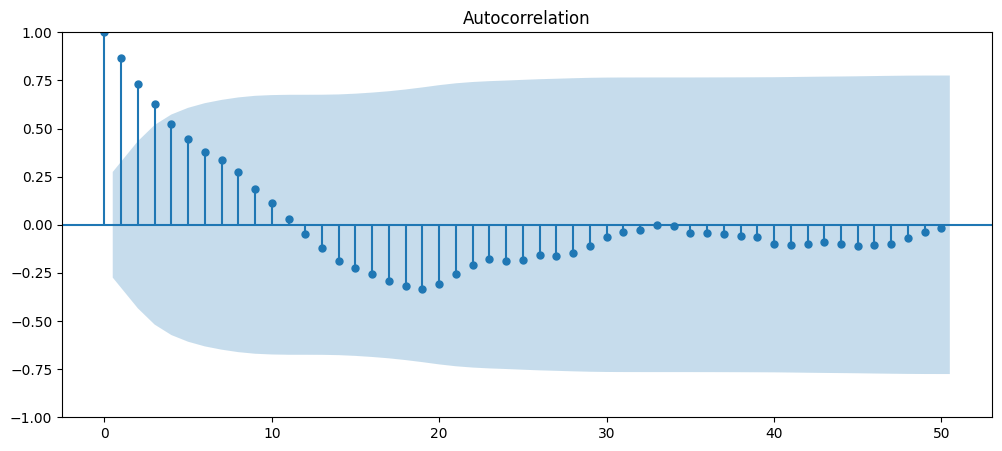

In [36]:
plt.rcParams["figure.figsize"] = (12,5)
plot_acf(exports_pre, lags=50)
plt.show()

Построим график частичной автокорреляции, чтобы определить параметр $q$ в модели SARIMAX.

/home/egor/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


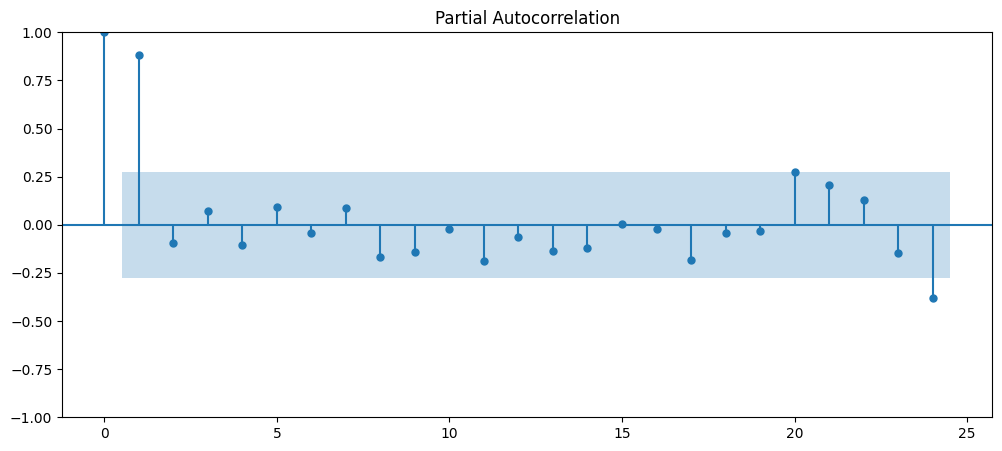

In [37]:
plt.rcParams["figure.figsize"] = (12,5)
plot_pacf(exports_pre, lags=24)
plt.show()

In [38]:
years_labels = years[len(years) - len_exports_pre:]
for i in range(forecast_year):
    years_labels = np.append(years_labels, f"{int(years_labels[len(years_labels) - 1]) + 1}")

In [39]:
model = SARIMAX(exports_pre,
                order = (4, 2, 1),
                seasonal_order = (2, 1, 1, 12)).fit(method='bfgs')

exports_forecast = model.predict(start = len_exports_pre,
                                 end = len_exports_pre + forecast_year - 1,
                                 typ = 'levels')

         Current function value: 1.465172
         Iterations: 50
         Function evaluations: 51
         Gradient evaluations: 51


/home/egor/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


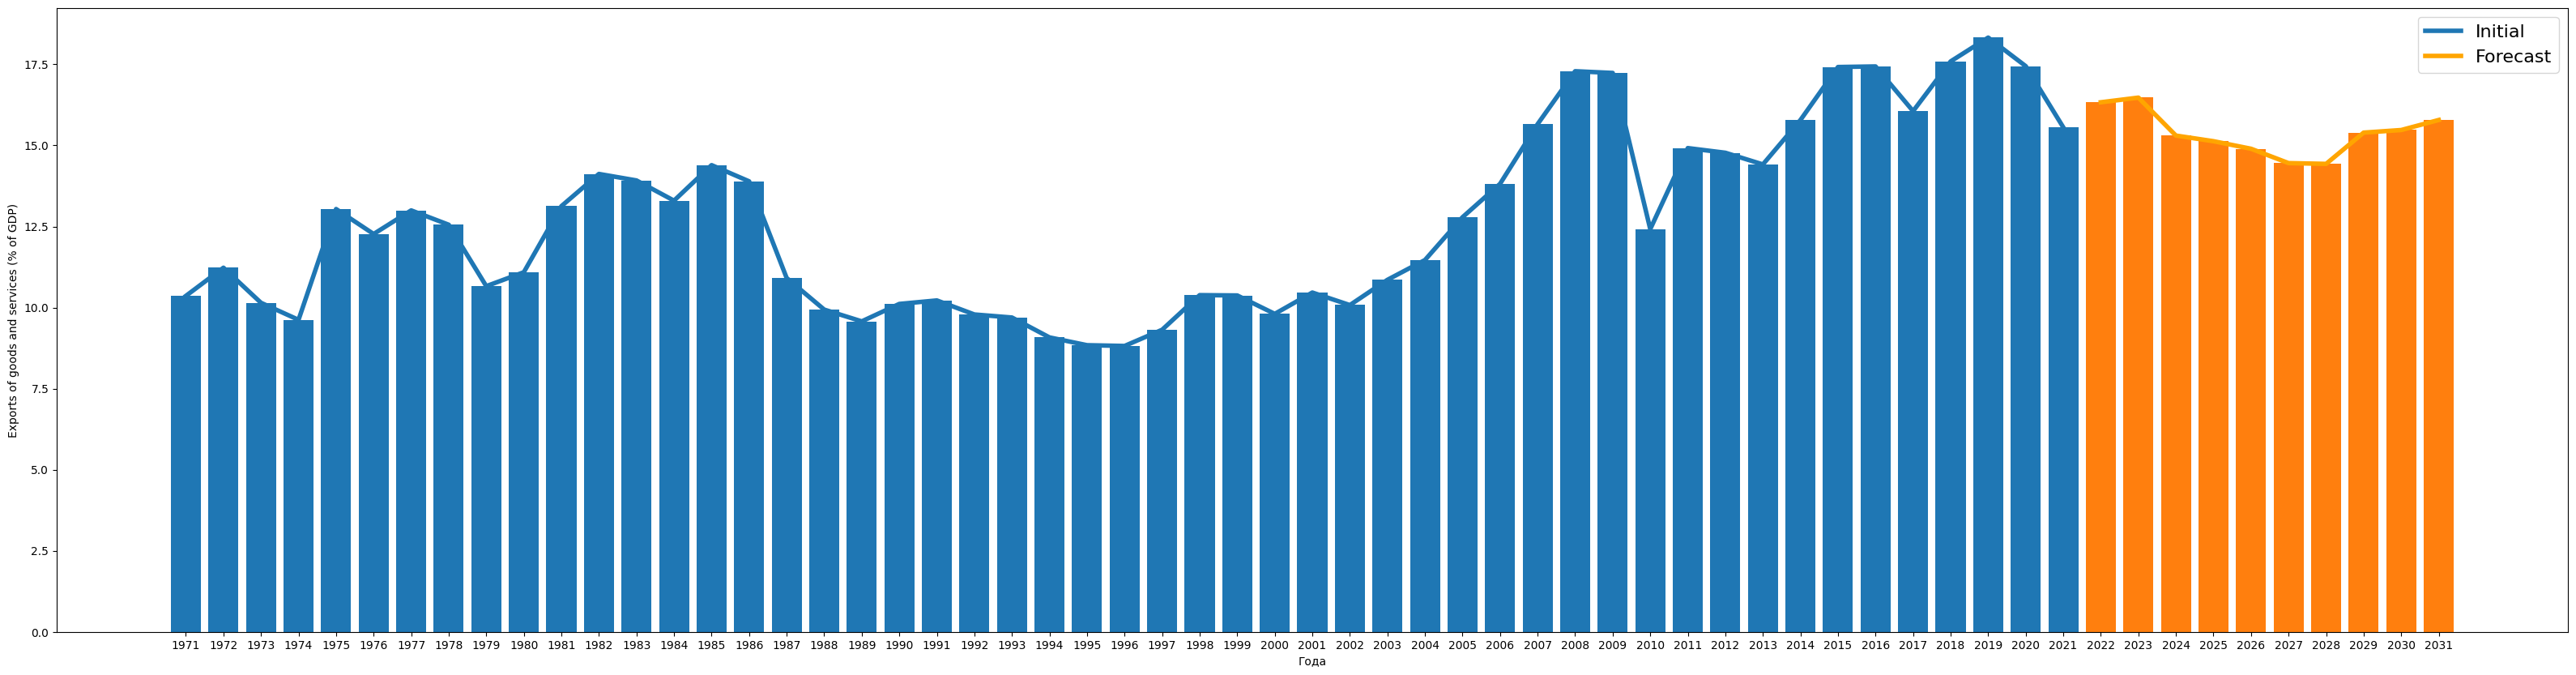

In [40]:
x_range = list(range(len_exports_pre))
forecast_x_range = list(range(len_exports_pre, len_exports_pre + forecast_year))
x_ticks_labels = list(range(len_exports_pre + forecast_year))

plt.figure(figsize=(40, 10))
plt.plot(x_range, exports_pre, linewidth="4", label="Initial")
plt.bar(x_range, exports_pre)
plt.plot(forecast_x_range, exports_forecast, linewidth="4", color="orange", label="Forecast")
plt.bar(forecast_x_range, exports_forecast)
plt.xticks(x_ticks_labels, years_labels)
plt.xlabel("Года")
plt.ylabel("Exports of goods and services (% of GDP)")
plt.legend(prop={'size': 16})
plt.show()

## Кластеры

В 2013 году Япония находилась в кластере стран со средним темпом роста подушевого ВВП, в 2019 году её кластер не изменился.

В 2013 году Япония находилась в кластере стран со средним темпом роста ВВП, в 2019 году она оказалась в кластере с низким темпом роста ВВП.

В 2013 году Япония находилась в кластере с низким темпом инфляции, в 2019 году её кластер не изменился.